In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [ ]:
dataset = load_wine()
df_wine= pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
df_wine['wine_class']=dataset['target']
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df_wine.shape

(178, 14)

In [ ]:
X=df_wine.iloc[:,0:12]
Y=df_wine.iloc[:,13:]


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

xtrain_scale=MinMaxScaler().fit_transform(xtrain)

xtest_scale=MinMaxScaler().fit_transform(xtest)

In [ ]:
model1=MLPClassifier(hidden_layer_sizes=(200,100),solver='adam',activation='logistic',max_iter=100)
model.fit(xtrain_scale,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(150, 100, 45), max_iter=300)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
ypred=model.predict(xtest_scale)
accuracy=accuracy_score(ytest,ypred)
accuracy

1.0

In [ ]:
cm=confusion_matrix(ytest,ypred)
cm

array([[23,  0,  0],
       [ 0, 19,  0],
       [ 0,  0, 12]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(xtrain_scale,ytrain)
acc=accuracy_score(ytest,rmodel.predict(xtest_scale))
acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9814814814814815

In [ ]:
rmodel.feature_importances_

array([0.17187976, 0.0320348 , 0.02550526, 0.02105984, 0.04576184,
       0.06698821, 0.16507835, 0.01728446, 0.01971272, 0.16247682,
       0.11567469, 0.15654325])

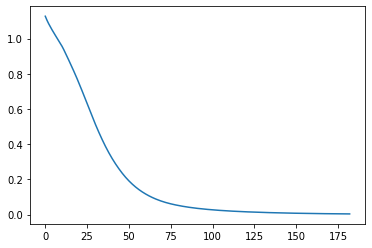

In [ ]:
plt.plot(model.loss_curve_)